<a href="https://colab.research.google.com/github/Trishika0611/Cognifyz-Technologies/blob/main/Cognify.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!pip install pandas numpy scikit-learn matplotlib folium jinja2 scipy


In [2]:
from google.colab import files
import io, pandas as pd

print("📤 Upload your dataset CSV file (e.g., Dataset.csv)")
uploaded = files.upload()

# Read the uploaded CSV
for fn in uploaded.keys():
    filename = fn
    print(f"✅ Loaded file: {filename}")
    df = pd.read_csv(io.BytesIO(uploaded[fn]))

print("Shape:", df.shape)
df.head()


📤 Upload your dataset CSV file (e.g., Dataset.csv)


Saving Dataset .csv to Dataset .csv
✅ Loaded file: Dataset .csv
Shape: (9551, 21)


,Restaurant ID,Restaurant Name,Country Code,City,Address,Locality,Locality Verbose,Longitude,Latitude,Cuisines,...,Currency,Has Table booking,Has Online delivery,Is delivering now,Switch to order menu,Price range,Aggregate rating,Rating color,Rating text,Votes
0,6317637,Le Petit Souffle,162,Makati City,"Third Floor, Century City Mall, Kalayaan Avenu...","Century City Mall, Poblacion, Makati City","Century City Mall, Poblacion, Makati City, Mak...",121.027535,14.565443,"French, Japanese, Desserts",...,Botswana Pula(P),Yes,No,No,No,3,4.8,Dark Green,Excellent,314
1,6304287,Izakaya Kikufuji,162,Makati City,"Little Tokyo, 2277 Chino Roces Avenue, Legaspi...","Little Tokyo, Legaspi Village, Makati City","Little Tokyo, Legaspi Village, Makati City, Ma...",121.014101,14.553708,Japanese,...,Botswana Pula(P),Yes,No,No,No,3,4.5,Dark Green,Excellent,591
2,6300002,Heat - Edsa Shangri-La,162,Mandaluyong City,"Edsa Shangri-La, 1 Garden Way, Ortigas, Mandal...","Edsa Shangri-La, Ortigas, Mandaluyong City","Edsa Shangri-La, Ortigas, Mandaluyong City, Ma...",121.056831,14.581404,"Seafood, Asian, Filipino, Indian",...,Botswana Pula(P),Yes,No,No,No,4,4.4,Green,Very Good,270
3,6318506,Ooma,162,Mandaluyong City,"Third Floor, Mega Fashion Hall, SM Megamall, O...","SM Megamall, Ortigas, Mandaluyong City","SM Megamall, Ortigas, Mandaluyong City, Mandal...",121.056475,14.585318,"Japanese, Sushi",...,Botswana Pula(P),No,No,No,No,4,4.9,Dark Green,Excellent,365
4,6314302,Sambo Kojin,162,Mandaluyong City,"Third Floor, Mega Atrium, SM Megamall, Ortigas...","SM Megamall, Ortigas, Mandaluyong City","SM Megamall, Ortigas, Mandaluyong City, Mandal...",121.057508,14.584450,"Japanese, Korean",...,Botswana Pula(P),Yes,No,No,No,4,4.8,Dark Green,Excellent,229


In [3]:
# Try to detect useful columns
import numpy as np

def guess_col(df, keywords):
    for c in df.columns:
        for k in keywords:
            if k.lower() in c.lower():
                return c
    return None

name_col = guess_col(df, ["name", "restaurant"])
rating_col = guess_col(df, ["rating", "aggregate"])
cuisine_col = guess_col(df, ["cuisine"])
city_col = guess_col(df, ["city", "locality", "area"])
lat_col = guess_col(df, ["lat"])
lon_col = guess_col(df, ["lon", "long"])
price_col = guess_col(df, ["price", "cost"])
votes_col = guess_col(df, ["vote"])

print("Detected columns:")
print("Name:", name_col)
print("Cuisine:", cuisine_col)
print("Rating:", rating_col)
print("City:", city_col)
print("Latitude:", lat_col)
print("Longitude:", lon_col)
print("Price:", price_col)
print("Votes:", votes_col)


Detected columns:
Name: Restaurant ID
Cuisine: Cuisines
Rating: Aggregate rating
City: City
Latitude: Latitude
Longitude: Longitude
Price: Average Cost for two
Votes: Votes


In [5]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score
import matplotlib.pyplot as plt

target_col = rating_col

# Select features (numeric + categorical)
features = [c for c in [votes_col, price_col, city_col, cuisine_col] if c in df.columns]

data = df.dropna(subset=[target_col])
X = data[features]
y = pd.to_numeric(data[target_col], errors='coerce')

num_cols = X.select_dtypes(include=np.number).columns.tolist()
cat_cols = [c for c in X.columns if c not in num_cols]

numeric_transformer = Pipeline([
    ('imputer', SimpleImputer(strategy='median')),
    ('scaler', StandardScaler())
])
categorical_transformer = Pipeline([
    ('imputer', SimpleImputer(strategy='most_frequent')),
    ('onehot', OneHotEncoder(handle_unknown='ignore'))
])

preprocessor = ColumnTransformer([
    ('num', numeric_transformer, num_cols),
    ('cat', categorical_transformer, cat_cols)
])

# Split data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Random Forest Model
rf_model = Pipeline([
    ('preprocess', preprocessor),
    ('model', RandomForestRegressor(n_estimators=100, random_state=42))
])

rf_model.fit(X_train, y_train)
preds = rf_model.predict(X_test)
rmse = mean_squared_error(y_test, preds)
r2 = r2_score(y_test, preds)

print(f"✅ Random Forest Regression: RMSE = {rmse:.3f}, R² = {r2:.3f}")

✅ Random Forest Regression: RMSE = 0.106, R² = 0.954


TASK 2 - Restaurant Recommendation System

In [6]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics.pairwise import cosine_similarity

df["content"] = df[[c for c in [cuisine_col, city_col, name_col] if c in df.columns]] \
    .fillna("").astype(str).agg(" ".join, axis=1)

vectorizer = TfidfVectorizer(stop_words='english')
tfidf_matrix = vectorizer.fit_transform(df["content"])

cosine_sim = cosine_similarity(tfidf_matrix, tfidf_matrix)

indices = pd.Series(df.index, index=df[name_col]).drop_duplicates()

def recommend(restaurant_name, top_n=5):
    idx = indices.get(restaurant_name)
    if idx is None:
        return f"'{restaurant_name}' not found."
    sim_scores = list(enumerate(cosine_sim[idx]))
    sim_scores = sorted(sim_scores, key=lambda x: x[1], reverse=True)[1:top_n+1]
    rec_indices = [i[0] for i in sim_scores]
    return df[[name_col, cuisine_col, city_col]].iloc[rec_indices]

# Example usage
sample_name = df[name_col].iloc[0]
print(f"🔍 Recommendations similar to '{sample_name}':")
recommend(sample_name)


🔍 Recommendations similar to '6317637':


,Restaurant ID,Cuisines,City
1,6304287,Japanese,Makati City
4993,18255171,"Japanese, French",New Delhi
9329,7100119,"French, Kiwi",Wellington City
9334,7100938,"Japanese, Asian",Wellington City
480,17621763,"Japanese, Sushi",Sioux City


TASK 3 – Cuisine Classification

✅ Accuracy: 0.38409209837781266

Classification Report:
               precision    recall  f1-score   support

    American       0.14      0.02      0.04        46
      Bakery       0.00      0.00      0.00       112
        Cafe       0.32      0.05      0.08       126
     Chinese       0.20      0.01      0.01       164
 Continental       0.00      0.00      0.00        41
   Fast Food       0.00      0.00      0.00       138
      Mithai       0.00      0.00      0.00        40
North Indian       0.35      0.95      0.51       598
       Other       0.65      0.29      0.40       530
South Indian       0.00      0.00      0.00        59
 Street Food       0.00      0.00      0.00        57

    accuracy                           0.38      1911
   macro avg       0.15      0.12      0.10      1911
weighted avg       0.33      0.38      0.28      1911



/usr/local/lib/python3.12/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.12/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.12/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


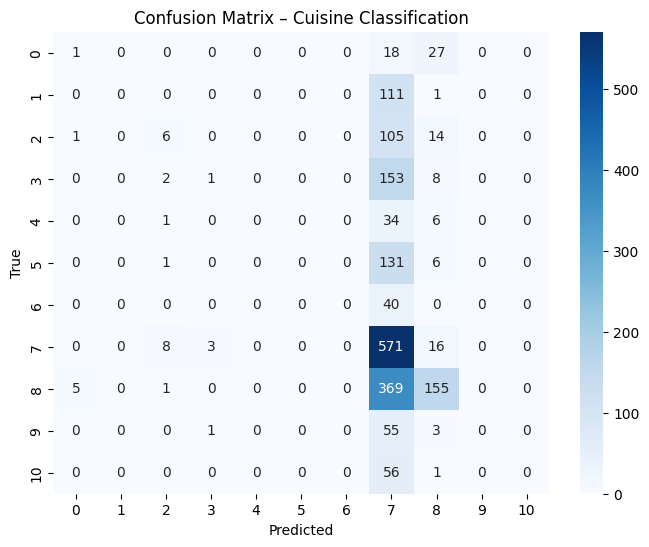

In [10]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import seaborn as sns

df["target_cuisine"] = df[cuisine_col].astype(str).str.split(",").str[0]
top_cuisines = df["target_cuisine"].value_counts().nlargest(10).index
df["target_reduced"] = df["target_cuisine"].apply(lambda x: x if x in top_cuisines else "Other")

# Convert columns to string type before joining
features_to_join = [name_col, city_col]
df[features_to_join] = df[features_to_join].fillna("").astype(str)

features_text = df[features_to_join].agg(" ".join, axis=1)
vec = TfidfVectorizer(max_features=1000, stop_words='english')
X_vec = vec.fit_transform(features_text)
y = df["target_reduced"]

X_train, X_test, y_train, y_test = train_test_split(X_vec, y, test_size=0.2, random_state=42)
clf = RandomForestClassifier(n_estimators=100, random_state=42)
clf.fit(X_train, y_train)
y_pred = clf.predict(X_test)

print("✅ Accuracy:", accuracy_score(y_test, y_pred))
print("\nClassification Report:\n", classification_report(y_test, y_pred))

plt.figure(figsize=(8,6))
sns.heatmap(confusion_matrix(y_test, y_pred), annot=True, fmt='d', cmap='Blues')
plt.title("Confusion Matrix – Cuisine Classification")
plt.xlabel("Predicted")
plt.ylabel("True")
plt.show()

TASK 4 – Location-Based Analysis

In [11]:
import folium
from folium.plugins import MarkerCluster

if lat_col and lon_col:
    m = folium.Map(location=[df[lat_col].mean(), df[lon_col].mean()], zoom_start=10)
    mc = MarkerCluster().add_to(m)

    for _, row in df.dropna(subset=[lat_col, lon_col]).iterrows():
        popup = f"<b>{row.get(name_col,'')}</b><br>Cuisine: {row.get(cuisine_col,'')}"
        folium.Marker([row[lat_col], row[lon_col]], popup=popup).add_to(mc)

    m.save("restaurants_map.html")
    print("✅ Saved interactive map: restaurants_map.html")
    m
else:
    print("⚠️ No latitude/longitude columns found.")


✅ Saved interactive map: restaurants_map.html
